# Example of MNIST hand written number recognition

In [1]:
%matplotlib inline
import numpy as np
import mnist_loader
import network as nw
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_context('talk')

In [2]:
def show(image):
    sns.heatmap(np.reshape(image, [28,28]), cmap=mpl.cm.Greys, xticklabels=False, yticklabels=False, cbar=False, square=True)

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

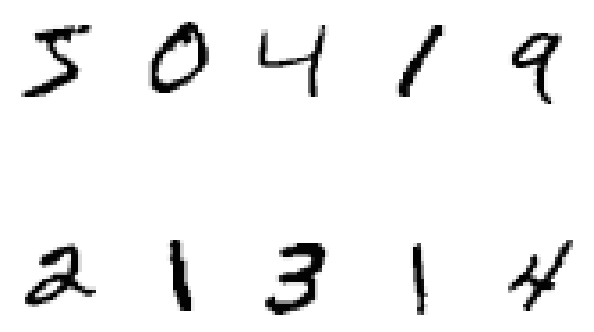

In [4]:
for n in range(10):
    plt.subplot(2, 5, n + 1)
    show(np.reshape(training_data[n][0], [28,28]))

# training a small net

In [5]:
net = nw.Network([784, 30, 10])

In [58]:
for epoch in range(10):
    net.fit_sgd(training_data, batch_size=10, learning_rate=3, epochs=1)
    test_results = [(np.argmax(net._input_layer.feedforward(x)), y)
                        for (x, y) in test_data]
    n_correct = sum(int(x == y) for (x, y) in test_results)
    print('Epoch {}, {} correct'.format(epoch, n_correct))

Epoch 0 done
Epoch 0, 9109 correct
Epoch 0 done
Epoch 1, 9190 correct
Epoch 0 done
Epoch 2, 9300 correct
Epoch 0 done
Epoch 3, 9278 correct
Epoch 0 done
Epoch 4, 9290 correct
Epoch 0 done
Epoch 5, 9292 correct
Epoch 0 done
Epoch 6, 9327 correct
Epoch 0 done
Epoch 7, 9343 correct
Epoch 0 done
Epoch 8, 9381 correct
Epoch 0 done
Epoch 9, 9376 correct


### focus of the first layer

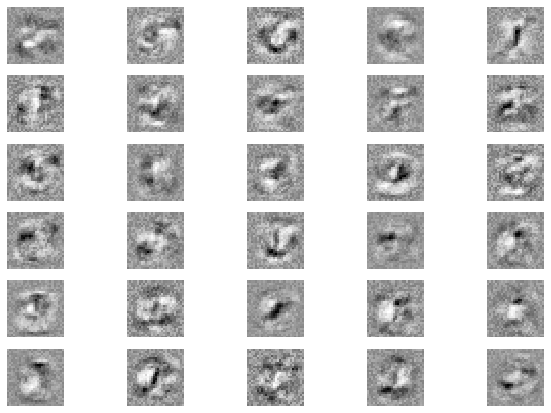

In [7]:
for n, node in enumerate(net._layers[1]._weights):
    if n < 30:
        plt.subplot(6, 5, n + 1)
        show(node)

### composition of weights (ie where does the net look at when you take the identity activation function)

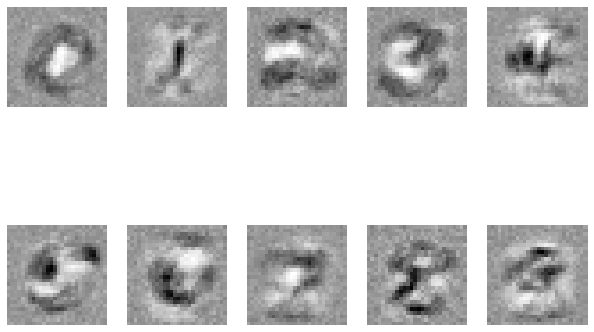

In [8]:
for n, node in enumerate(np.dot(net._layers[2]._weights, net._layers[1]._weights)):
    plt.subplot(2, 5, n + 1)
    show(node)

# Transform pictures to be recognised as certain number by the net

In [96]:
def trick_net(data, target_number, confidence=0.95, learning_rate=5, max_iter=100000):
    data = data.copy()
    target_data = np.zeros([10, 1])
    target_data[target_number] = 1
    iterations = 0
    while (net.feedforward(data)[target_number][0] < confidence):
        delta = net.get_delta([[data, target_data]])
        data = data - learning_rate * delta
        iterations += 1
        if iterations > max_iter:
            break
    return data

### turning a 7 into a 3

In [98]:
fake_image = trick_net(data=fake_zero[0], target_number=3)

In [99]:
net.feedforward(fake_image)

array([[  2.22017381e-03],
       [  8.79340979e-03],
       [  1.78580281e-04],
       [  9.53100711e-01],
       [  3.34036352e-07],
       [  2.70693007e-03],
       [  2.12764601e-06],
       [  5.01573383e-02],
       [  3.36559185e-04],
       [  3.04384381e-04]])

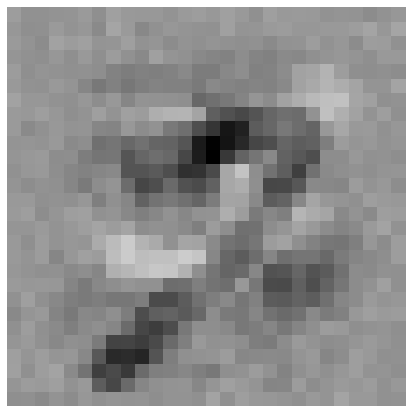

In [100]:
show(fake_image)

### turning blank images into numbers

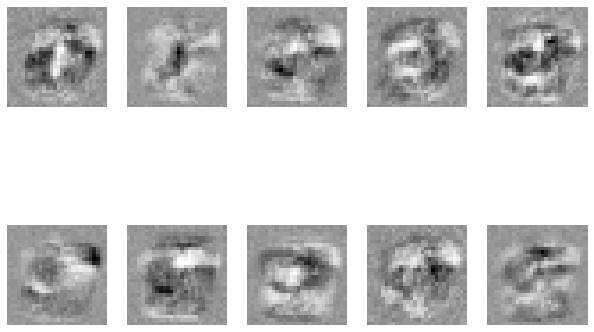

In [94]:
zeros = np.zeros([784, 1])
for n in range(10):
    plt.subplot(2, 5, n + 1)
    show(trick_net(zeros, n, confidence=0.95))